In [1]:
from pysummarization.abstractablesemantics.re_seq_2_seq import ReSeq2Seq

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)
logger = getLogger("pysummarization")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)


In [3]:
# cited from https://en.wikipedia.org/wiki/Encyclopedia
document = """
An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories. Encyclopedia entries are longer and more detailed than those in most dictionaries.[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.[3][4][5][6]

Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), cultural perceptions (authoritative, ideological, didactic, utilitarian), authorship (qualifications, style), readership (education level, background, interests, capabilities), and the technologies available for their production and distribution (hand-written manuscripts, small or large print runs, internet production). As a valued source of reliable information compiled by experts, printed versions found a prominent place in libraries, schools and other educational institutions.

The appearance of digital and open-source versions in the 20th century has vastly expanded the accessibility, authorship, readership, and variety of encyclopedia entries and called into question the idea of what an encyclopedia is[citation needed] and the relevance of applying to such dynamic productions the traditional criteria for assembling and evaluating print encyclopedias.[citation needed]

Title page of Skalich's Encyclopaedia, seu orbis disciplinarum, tam sacrarum quam prophanarum, epistemon from 1559, first clear use of the word encyclopaedia in the title.[14]
Sixteenth century usage of the compounded word
In the sixteenth century there was a level of ambiguity as to how to use this new word. As several titles illustrate, there was not a settled notion about its spelling nor its status as a noun. For example: Jacobus Philomusus's Margarita philosophica encyclopaediam exhibens (1508); Johannes Aventinus's Encyclopedia orbisque doctrinarum, hoc est omnium artium, scientiarum, ipsius philosophiae index ac divisio; Joachimus Fortius Ringelbergius's Lucubrationes vel potius absolutissima kyklopaideia (1538, 1541); Paul Skalich's Encyclopaediae sen orbis disciplinarum epistemon (1559); Gregor Reisch's Margarita philosophica (1503, retitled Encyclopaedia in 1583); and Samuel Eisenmenger's Cyclopaedia Paracelsica (1585).[15] It is only with Pavao Skalić and his Encyclopediae seu orbis disciplinarum tam sacrarum quam profanarum epistemon (Encyclopaedia, or Knowledge of the World of Disciplines, Basel, 1559) that the term became first recognized as a noun.[citation needed]

There have been two examples of the oldest vernacular use of the compounded word. In approximately 1490, Franciscus Puccius wrote a letter to Politianus thanking him for his Miscellanea, calling it an encyclopedia.[16] More commonly, François Rabelais is cited for his use of the term in Pantagruel (1532).[17][18]

The suffix -p(a)edia
Several encyclopedias have names that include the suffix -p(a)edia, to mark the text as belonging to the genre of encyclopedias. For example, Banglapedia (on matters relevant for Bangladesh).

Contemporary usage
Today in English, the word is most commonly spelled encyclopedia, though encyclopaedia (from encyclopædia) is also used in Britain.[19]

Characteristics
The modern encyclopedia was developed from the dictionary in the 18th century. Historically, both encyclopedias and dictionaries have been researched and written by well-educated, well-informed content experts, but they are significantly different in structure. A dictionary is a linguistic work which primarily focuses on alphabetical listing of words and their definitions. Synonymous words and those related by the subject matter are to be found scattered around the dictionary, giving no obvious place for in-depth treatment. Thus, a dictionary typically provides limited information, analysis or background for the word defined. While it may offer a definition, it may leave the reader lacking in understanding the meaning, significance or limitations of a term, and how the term relates to a broader field of knowledge. An encyclopedia is, theoretically, not written in order to convince, although one of its goals is indeed to convince its reader of its own veracity.

To address those needs, an encyclopedia article is typically not limited to simple definitions, and is not limited to defining an individual word, but provides a more extensive meaning for a subject or discipline. In addition to defining and listing synonymous terms for the topic, the article is able to treat the topic's more extensive meaning in more depth and convey the most relevant accumulated knowledge on that subject. An encyclopedia article also often includes many maps and illustrations, as well as bibliography and statistics.

Four major elements define an encyclopedia: its subject matter, its scope, its method of organization, and its method of production:


"""

In [4]:
from pysummarization.nlp_base import NlpBase
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer

In [5]:
nlp_base = NlpBase()
nlp_base.delimiter_list = [".", "\n"]
tokenizable_doc = SimpleTokenizer()
sentence_list = nlp_base.listup_sentence(document)
token_list = tokenizable_doc.tokenize(document)

In [6]:
sentence_list, len(sentence_list)

(['An encyclopedia or encyclopædia is a reference work or compendium providing summaries of knowledge from either all branches or from a particular field or discipline.\n',
  '[1] Encyclopedias are divided into articles or entries that are often arranged alphabetically by article name[2] and sometimes by thematic categories.\n',
  ' Encyclopedia entries are longer and more detailed than those in most dictionaries.\n',
  "[2] Generally speaking, unlike dictionary entries—which focus on linguistic information about words, such as their etymology, meaning, pronunciation, use, and grammatical forms—encyclopedia articles focus on factual information concerning the subject named in the article's title.\n",
  '[3][4][5][6]\n',
  'Encyclopedias have existed for around 2,000 years and have evolved considerably since that time as to language (written in a major international or a vernacular language), size (few or many volumes), intent (presentation of a global or a limited range of knowledge), 

In [7]:
len(list(set(token_list)))

438

In [8]:
token_arr = np.array(token_list)

In [9]:
from pysummarization.vectorizabletoken.skip_gram_vectorizer import SkipGramVectorizer

In [10]:
vectorizable_token = SkipGramVectorizer(
    token_list=token_arr.tolist(),
    epochs=1000,
    skip_n=2,
    batch_size=20,
    feature_dim=500,
    learning_rate=1e-06,
    scale=1e-05,
)

Setup NN layers and the parameters.
Setup NN layers and the parameters.
Setup NN layers and the parameters.


In [11]:
vectorizable_token.learn()

NN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 6.082218910972427 Test: 6.082218801284941
Best params are updated.
Epoch: 2
Loss: 
Training: 6.082218501001338 Test: 6.082218282335928
Best params are updated.
Epoch: 3
Loss: 
Training: 6.082217333986151 Test: 6.082218944774123
Epoch: 4
Loss: 
Training: 6.0822175046462075 Test: 6.082218236740072
Best params are updated.
Epoch: 5
Loss: 
Training: 6.082216776172369 Test: 6.082217517585702
Best params are updated.
Epoch: 6
Loss: 
Training: 6.082216116526045 Test: 6.082217592495913
Best params are updated.
Epoch: 7
Loss: 
Training: 6.082215427169279 Test: 6.0822162875676025
Best params are updated.
Epoch: 8
Loss: 
Training: 6.082212266079675 Test: 6.082214918893017
Best params are updated.
Epoch: 9
Loss: 
Training: 6.082211262851014 Test: 6.0822162001442
Epoch: 10
Loss: 
Training: 6.082211878148857 Test: 6.08221397136319
Best params are updated.
Epoch: 11
Loss: 
Training: 6.082208257745745 Test: 6.082216809189571
Rollin

Rolling mean of Loss (Window is 10): 
Training: 6.0821693575519 Test: 6.082203816136242
Epoch: 54
Loss: 
Training: 6.082165694633699 Test: 6.0822039099082845
Rolling mean of Loss (Window is 10): 
Training: 6.08216913247435 Test: 6.082202836723096
Epoch: 55
Loss: 
Training: 6.082166712329657 Test: 6.082211078418868
Rolling mean of Loss (Window is 10): 
Training: 6.082168328126537 Test: 6.082201721225345
Epoch: 56
Loss: 
Training: 6.082169404628132 Test: 6.082203480463197
Rolling mean of Loss (Window is 10): 
Training: 6.082167583565134 Test: 6.082202614431781
Epoch: 57
Loss: 
Training: 6.082167769718668 Test: 6.082198951261882
Rolling mean of Loss (Window is 10): 
Training: 6.082167714038955 Test: 6.082201944116411
Epoch: 58
Loss: 
Training: 6.082164641030624 Test: 6.082201948031068
Rolling mean of Loss (Window is 10): 
Training: 6.0821677099717935 Test: 6.082201201056721
Epoch: 59
Loss: 
Training: 6.082165590212011 Test: 6.082205721848267
Rolling mean of Loss (Window is 10): 
Training:

Rolling mean of Loss (Window is 10): 
Training: 6.08216163747704 Test: 6.0821973291963785
Epoch: 105
Loss: 
Training: 6.082161186386965 Test: 6.082185606901813
Rolling mean of Loss (Window is 10): 
Training: 6.082161966556085 Test: 6.08219799132007
Epoch: 106
Loss: 
Training: 6.082163853661945 Test: 6.08218701652678
Rolling mean of Loss (Window is 10): 
Training: 6.082161722872283 Test: 6.082198302745118
Epoch: 107
Loss: 
Training: 6.0821587938544575 Test: 6.082187140286317
Rolling mean of Loss (Window is 10): 
Training: 6.082162190446345 Test: 6.082196646803411
Epoch: 108
Loss: 
Training: 6.0821632253953455 Test: 6.0821933499510346
Rolling mean of Loss (Window is 10): 
Training: 6.0821622046993316 Test: 6.082195480977151
Epoch: 109
Loss: 
Training: 6.082159583088017 Test: 6.082197919324369
Rolling mean of Loss (Window is 10): 
Training: 6.082162291709899 Test: 6.082193609306487
Epoch: 110
Loss: 
Training: 6.082161549757354 Test: 6.0821900168968135
Rolling mean of Loss (Window is 10): 

Rolling mean of Loss (Window is 10): 
Training: 6.082159200357225 Test: 6.082196136105132
Epoch: 156
Loss: 
Training: 6.082157027762026 Test: 6.082209430878246
Rolling mean of Loss (Window is 10): 
Training: 6.0821595510196085 Test: 6.082195308322973
Epoch: 157
Loss: 
Training: 6.082161300820368 Test: 6.082187698115732
Rolling mean of Loss (Window is 10): 
Training: 6.082159639721927 Test: 6.082197884594627
Epoch: 158
Loss: 
Training: 6.082160222993387 Test: 6.082188016980737
Rolling mean of Loss (Window is 10): 
Training: 6.082159273527887 Test: 6.082197454991752
Epoch: 159
Loss: 
Training: 6.082164305070839 Test: 6.082185352777222
Rolling mean of Loss (Window is 10): 
Training: 6.082159887202726 Test: 6.082197842843173
Epoch: 160
Loss: 
Training: 6.08216188680486 Test: 6.082200610262798
Rolling mean of Loss (Window is 10): 
Training: 6.082160197708701 Test: 6.082196619774203
Epoch: 161
Loss: 
Training: 6.082160943089059 Test: 6.082189862290844
Rolling mean of Loss (Window is 10): 
Tr

Rolling mean of Loss (Window is 10): 
Training: 6.082160250478362 Test: 6.082195265976248
Epoch: 207
Loss: 
Training: 6.082166937125104 Test: 6.082210212394163
Rolling mean of Loss (Window is 10): 
Training: 6.082159855726827 Test: 6.082194792406448
Epoch: 208
Loss: 
Training: 6.082160164143062 Test: 6.082205102774883
Rolling mean of Loss (Window is 10): 
Training: 6.082159992233164 Test: 6.082196208769625
Epoch: 209
Loss: 
Training: 6.082165760650975 Test: 6.082196789388919
Rolling mean of Loss (Window is 10): 
Training: 6.082160174936566 Test: 6.082198033964014
Epoch: 210
Loss: 
Training: 6.082161928953824 Test: 6.082201050798057
Rolling mean of Loss (Window is 10): 
Training: 6.082160560639934 Test: 6.08219838978234
Epoch: 211
Loss: 
Training: 6.082162778419334 Test: 6.0822056629241485
Rolling mean of Loss (Window is 10): 
Training: 6.082160722646908 Test: 6.082198442490856
Epoch: 212
Loss: 
Training: 6.082156931639359 Test: 6.082192317118727
Rolling mean of Loss (Window is 10): 
Tr

Rolling mean of Loss (Window is 10): 
Training: 6.082158064711072 Test: 6.082198828300148
Epoch: 258
Loss: 
Training: 6.082157950075206 Test: 6.082196883840725
Rolling mean of Loss (Window is 10): 
Training: 6.082157438756527 Test: 6.082198549587231
Epoch: 259
Loss: 
Training: 6.082160028630671 Test: 6.082195952952221
Rolling mean of Loss (Window is 10): 
Training: 6.082157429651772 Test: 6.082198651408767
Epoch: 260
Loss: 
Training: 6.082155550591996 Test: 6.082203653594765
Rolling mean of Loss (Window is 10): 
Training: 6.082157681356435 Test: 6.0821981091668595
Epoch: 261
Loss: 
Training: 6.082157830190786 Test: 6.082188546476155
Rolling mean of Loss (Window is 10): 
Training: 6.082157402726694 Test: 6.082197873357598
Epoch: 262
Loss: 
Training: 6.082159135490802 Test: 6.08220581958422
Rolling mean of Loss (Window is 10): 
Training: 6.082157587309178 Test: 6.082197100459532
Epoch: 263
Loss: 
Training: 6.08215721711416 Test: 6.082201421475881
Rolling mean of Loss (Window is 10): 
Tra

Epoch: 309
Loss: 
Training: 6.082159682011971 Test: 6.082201468810218
Rolling mean of Loss (Window is 10): 
Training: 6.082162183438051 Test: 6.082200719818919
Epoch: 310
Loss: 
Training: 6.082158141107643 Test: 6.0821937327476805
Rolling mean of Loss (Window is 10): 
Training: 6.0821619237727 Test: 6.0822009049977375
Epoch: 311
Loss: 
Training: 6.082160570030286 Test: 6.08219865422949
Rolling mean of Loss (Window is 10): 
Training: 6.082161592269386 Test: 6.082199728219883
Epoch: 312
Loss: 
Training: 6.0821599188393245 Test: 6.082187633746374
Rolling mean of Loss (Window is 10): 
Training: 6.082161669800082 Test: 6.082200288559055
Epoch: 313
Loss: 
Training: 6.082161488370658 Test: 6.082193850177372
Rolling mean of Loss (Window is 10): 
Training: 6.082161326072528 Test: 6.082198837203384
Epoch: 314
Loss: 
Training: 6.082159993464966 Test: 6.08220873579532
Rolling mean of Loss (Window is 10): 
Training: 6.082161024799193 Test: 6.082198455531855
Epoch: 315
Loss: 
Training: 6.08216152639

Rolling mean of Loss (Window is 10): 
Training: 6.082160413999116 Test: 6.0821999494050845
Epoch: 361
Loss: 
Training: 6.082159546771388 Test: 6.0822137258316165
Rolling mean of Loss (Window is 10): 
Training: 6.082160411346209 Test: 6.082200348456451
Epoch: 362
Loss: 
Training: 6.0821615211800975 Test: 6.082199696266892
Rolling mean of Loss (Window is 10): 
Training: 6.0821599380889495 Test: 6.082201155163063
Epoch: 363
Loss: 
Training: 6.082161669649695 Test: 6.082200054834045
Rolling mean of Loss (Window is 10): 
Training: 6.08216016791783 Test: 6.08220105701985
Epoch: 364
Loss: 
Training: 6.082159564795136 Test: 6.082196817463852
Rolling mean of Loss (Window is 10): 
Training: 6.082160810138101 Test: 6.082202148224397
Epoch: 365
Loss: 
Training: 6.082160147329351 Test: 6.0822005239959624
Rolling mean of Loss (Window is 10): 
Training: 6.082160608908849 Test: 6.082202196862777
Epoch: 366
Loss: 
Training: 6.082163662262584 Test: 6.082185618054721
Rolling mean of Loss (Window is 10): 

Training: 6.082160461647847 Test: 6.082192829045187
Epoch: 412
Loss: 
Training: 6.082160109888763 Test: 6.082196223250283
Rolling mean of Loss (Window is 10): 
Training: 6.082161073243741 Test: 6.082192159480053
Epoch: 413
Loss: 
Training: 6.082155424847291 Test: 6.082193634990927
Rolling mean of Loss (Window is 10): 
Training: 6.082161352818858 Test: 6.082192603633309
Epoch: 414
Loss: 
Training: 6.082158576746103 Test: 6.082205161325968
Rolling mean of Loss (Window is 10): 
Training: 6.082160801793389 Test: 6.0821931894275005
Epoch: 415
Loss: 
Training: 6.082161440224766 Test: 6.082195744316769
Rolling mean of Loss (Window is 10): 
Training: 6.0821606487984585 Test: 6.082193826668845
Epoch: 416
Loss: 
Training: 6.0821639784994606 Test: 6.082197061781974
Rolling mean of Loss (Window is 10): 
Training: 6.082160263376458 Test: 6.082194315365269
Epoch: 417
Loss: 
Training: 6.082155008448854 Test: 6.08219387718127
Rolling mean of Loss (Window is 10): 
Training: 6.082160746172332 Test: 6.08

Epoch: 463
Loss: 
Training: 6.082161020128275 Test: 6.08218070282225
Rolling mean of Loss (Window is 10): 
Training: 6.082160056132192 Test: 6.082194427226765
Epoch: 464
Loss: 
Training: 6.082165588096767 Test: 6.082184751530056
Rolling mean of Loss (Window is 10): 
Training: 6.082160582911733 Test: 6.08219264584592
Epoch: 465
Loss: 
Training: 6.082161862330604 Test: 6.082195113312834
Rolling mean of Loss (Window is 10): 
Training: 6.082160798304388 Test: 6.0821922052619115
Epoch: 466
Loss: 
Training: 6.082162087029936 Test: 6.082202879766928
Rolling mean of Loss (Window is 10): 
Training: 6.082161005798978 Test: 6.082193111585159
Epoch: 467
Loss: 
Training: 6.082162336762859 Test: 6.082197548631661
Rolling mean of Loss (Window is 10): 
Training: 6.082161145836688 Test: 6.082193483114236
Epoch: 468
Loss: 
Training: 6.0821644754302095 Test: 6.082203370610933
Rolling mean of Loss (Window is 10): 
Training: 6.08216118080726 Test: 6.08219260594555
Epoch: 469
Loss: 
Training: 6.082166116768

Epoch: 514
Loss: 
Training: 6.082160139938206 Test: 6.082209769260129
Rolling mean of Loss (Window is 10): 
Training: 6.082159239508486 Test: 6.082202434447966
Epoch: 515
Loss: 
Training: 6.082156067548054 Test: 6.082216005943988
Rolling mean of Loss (Window is 10): 
Training: 6.0821592682292005 Test: 6.082202400636073
Epoch: 516
Loss: 
Training: 6.082157274990804 Test: 6.082187443296555
Rolling mean of Loss (Window is 10): 
Training: 6.0821587802670205 Test: 6.082202815512736
Epoch: 517
Loss: 
Training: 6.082162340837418 Test: 6.082201241842864
Rolling mean of Loss (Window is 10): 
Training: 6.082158709555208 Test: 6.0822008698912295
Epoch: 518
Loss: 
Training: 6.0821627219425975 Test: 6.082194368730227
Rolling mean of Loss (Window is 10): 
Training: 6.082158940251282 Test: 6.082201952823677
Epoch: 519
Loss: 
Training: 6.082157138895429 Test: 6.082194955638863
Rolling mean of Loss (Window is 10): 
Training: 6.082159471720005 Test: 6.082202465362146
Epoch: 520
Loss: 
Training: 6.082159

Rolling mean of Loss (Window is 10): 
Training: 6.082160755657912 Test: 6.0821972800227515
Epoch: 566
Loss: 
Training: 6.082159671440767 Test: 6.082203202474142
Rolling mean of Loss (Window is 10): 
Training: 6.082161444411997 Test: 6.082196144752383
Epoch: 567
Loss: 
Training: 6.082160564302135 Test: 6.082208433334611
Rolling mean of Loss (Window is 10): 
Training: 6.082161432460831 Test: 6.082197201246165
Epoch: 568
Loss: 
Training: 6.0821624096088645 Test: 6.082184088997162
Rolling mean of Loss (Window is 10): 
Training: 6.082161421208905 Test: 6.082198249537698
Epoch: 569
Loss: 
Training: 6.082165135159491 Test: 6.082212924785532
Rolling mean of Loss (Window is 10): 
Training: 6.082161507449408 Test: 6.0821966289342715
Epoch: 570
Loss: 
Training: 6.082158589600127 Test: 6.082202714400123
Rolling mean of Loss (Window is 10): 
Training: 6.082162197724792 Test: 6.082198434381389
Epoch: 571
Loss: 
Training: 6.082159356479274 Test: 6.082183068723445
Rolling mean of Loss (Window is 10): 

Training: 6.082160413641354 Test: 6.082196617974754
Epoch: 617
Loss: 
Training: 6.082162949111575 Test: 6.082195902012154
Rolling mean of Loss (Window is 10): 
Training: 6.082160450033973 Test: 6.082197396265363
Epoch: 618
Loss: 
Training: 6.082160716487516 Test: 6.082190508526921
Rolling mean of Loss (Window is 10): 
Training: 6.082161050178291 Test: 6.082196775415137
Epoch: 619
Loss: 
Training: 6.082163869808119 Test: 6.082196476433957
Rolling mean of Loss (Window is 10): 
Training: 6.082160832011607 Test: 6.082197343854605
Epoch: 620
Loss: 
Training: 6.082156417987015 Test: 6.0821998317398105
Rolling mean of Loss (Window is 10): 
Training: 6.082161222246583 Test: 6.082196718188036
Epoch: 621
Loss: 
Training: 6.082166245088198 Test: 6.082202009379593
Rolling mean of Loss (Window is 10): 
Training: 6.0821609227100755 Test: 6.082196411546062
Epoch: 622
Loss: 
Training: 6.082162609399372 Test: 6.082191676801051
Rolling mean of Loss (Window is 10): 
Training: 6.082161149562852 Test: 6.08

Epoch: 668
Loss: 
Training: 6.082163046145389 Test: 6.082186138383676
Rolling mean of Loss (Window is 10): 
Training: 6.082161489833882 Test: 6.082198584232686
Epoch: 669
Loss: 
Training: 6.082158313370233 Test: 6.082190812836574
Rolling mean of Loss (Window is 10): 
Training: 6.082161255336205 Test: 6.082196541943136
Epoch: 670
Loss: 
Training: 6.082165393485829 Test: 6.0821937569839815
Rolling mean of Loss (Window is 10): 
Training: 6.082161374961541 Test: 6.082196174573157
Epoch: 671
Loss: 
Training: 6.082156852012052 Test: 6.082196489374148
Rolling mean of Loss (Window is 10): 
Training: 6.082161878712119 Test: 6.082196373300535
Epoch: 672
Loss: 
Training: 6.082164588752779 Test: 6.082192414184688
Rolling mean of Loss (Window is 10): 
Training: 6.082161645993919 Test: 6.0821975665887855
Epoch: 673
Loss: 
Training: 6.0821579613292425 Test: 6.082196825560432
Rolling mean of Loss (Window is 10): 
Training: 6.0821621198987526 Test: 6.082195178452024
Epoch: 674
Loss: 
Training: 6.082160

Rolling mean of Loss (Window is 10): 
Training: 6.082160192362902 Test: 6.0821960783023155
Epoch: 720
Loss: 
Training: 6.082161379983188 Test: 6.082190373433855
Rolling mean of Loss (Window is 10): 
Training: 6.082159441677569 Test: 6.082196177976262
Epoch: 721
Loss: 
Training: 6.08216388208133 Test: 6.082194146396537
Rolling mean of Loss (Window is 10): 
Training: 6.0821600008507195 Test: 6.082196874671564
Epoch: 722
Loss: 
Training: 6.082159745122583 Test: 6.08220930859307
Rolling mean of Loss (Window is 10): 
Training: 6.082160036003829 Test: 6.082198233901481
Epoch: 723
Loss: 
Training: 6.082160965499907 Test: 6.082194236670559
Rolling mean of Loss (Window is 10): 
Training: 6.082160065951487 Test: 6.082197489088132
Epoch: 724
Loss: 
Training: 6.082163546552438 Test: 6.082200200181304
Rolling mean of Loss (Window is 10): 
Training: 6.082159944798198 Test: 6.082197906520969
Epoch: 725
Loss: 
Training: 6.082163077722187 Test: 6.082195188375321
Rolling mean of Loss (Window is 10): 
Tr

Training: 6.082159590586981 Test: 6.082198929355319
Epoch: 771
Loss: 
Training: 6.082161887444237 Test: 6.082206555612937
Rolling mean of Loss (Window is 10): 
Training: 6.082159961513165 Test: 6.082196486705187
Epoch: 772
Loss: 
Training: 6.08216275247536 Test: 6.082200301503434
Rolling mean of Loss (Window is 10): 
Training: 6.082160430686624 Test: 6.082197899768206
Epoch: 773
Loss: 
Training: 6.082160343459281 Test: 6.082194988291837
Rolling mean of Loss (Window is 10): 
Training: 6.082160217256567 Test: 6.082197637885186
Epoch: 774
Loss: 
Training: 6.082163546813973 Test: 6.082198473088786
Rolling mean of Loss (Window is 10): 
Training: 6.082160412745436 Test: 6.082195887523914
Epoch: 775
Loss: 
Training: 6.082160601540691 Test: 6.082206134232797
Rolling mean of Loss (Window is 10): 
Training: 6.082160736198836 Test: 6.082197248043179
Epoch: 776
Loss: 
Training: 6.082160506193576 Test: 6.0822187563624395
Rolling mean of Loss (Window is 10): 
Training: 6.082160488937605 Test: 6.0821

Epoch: 822
Loss: 
Training: 6.082157949546021 Test: 6.082196735028866
Rolling mean of Loss (Window is 10): 
Training: 6.082160898088263 Test: 6.082195361333159
Epoch: 823
Loss: 
Training: 6.08216595004692 Test: 6.082193682643285
Rolling mean of Loss (Window is 10): 
Training: 6.0821608152202495 Test: 6.08219632456884
Epoch: 824
Loss: 
Training: 6.082159725881781 Test: 6.082195886144118
Rolling mean of Loss (Window is 10): 
Training: 6.0821610747478365 Test: 6.082194945347158
Epoch: 825
Loss: 
Training: 6.082156556319224 Test: 6.082201548134484
Rolling mean of Loss (Window is 10): 
Training: 6.082160884789799 Test: 6.082194233572592
Epoch: 826
Loss: 
Training: 6.082158256460065 Test: 6.082195341718866
Rolling mean of Loss (Window is 10): 
Training: 6.082160392442885 Test: 6.082195303606924
Epoch: 827
Loss: 
Training: 6.082162658365978 Test: 6.08220095437574
Rolling mean of Loss (Window is 10): 
Training: 6.082160261300338 Test: 6.082195500083335
Epoch: 828
Loss: 
Training: 6.08215878548

Rolling mean of Loss (Window is 10): 
Training: 6.082160363701569 Test: 6.0822010776525035
Epoch: 874
Loss: 
Training: 6.082160382566437 Test: 6.082187578204207
Rolling mean of Loss (Window is 10): 
Training: 6.0821602774981285 Test: 6.0822005446457315
Epoch: 875
Loss: 
Training: 6.082161576564212 Test: 6.082196552013721
Rolling mean of Loss (Window is 10): 
Training: 6.082160605755153 Test: 6.08219864761691
Epoch: 876
Loss: 
Training: 6.082160702780838 Test: 6.082190186079524
Rolling mean of Loss (Window is 10): 
Training: 6.082160592198747 Test: 6.082200132680297
Epoch: 877
Loss: 
Training: 6.08216041680241 Test: 6.0822071804435724
Rolling mean of Loss (Window is 10): 
Training: 6.082160453531907 Test: 6.082199381840725
Epoch: 878
Loss: 
Training: 6.082161298759464 Test: 6.082189030935794
Rolling mean of Loss (Window is 10): 
Training: 6.082160531986526 Test: 6.082199547323508
Epoch: 879
Loss: 
Training: 6.082158806343484 Test: 6.0821820858685065
Rolling mean of Loss (Window is 10): 

Training: 6.082160762933954 Test: 6.082200457472458
Epoch: 925
Loss: 
Training: 6.08216011789588 Test: 6.082188799598404
Rolling mean of Loss (Window is 10): 
Training: 6.082160841000417 Test: 6.082200065146713
Epoch: 926
Loss: 
Training: 6.082163656057073 Test: 6.082203529065881
Rolling mean of Loss (Window is 10): 
Training: 6.08216098210628 Test: 6.082198751995035
Epoch: 927
Loss: 
Training: 6.082160057523971 Test: 6.082194104789166
Rolling mean of Loss (Window is 10): 
Training: 6.08216140647953 Test: 6.0821986520818925
Epoch: 928
Loss: 
Training: 6.082161391174443 Test: 6.082203031891169
Rolling mean of Loss (Window is 10): 
Training: 6.082161492148926 Test: 6.082198565075503
Epoch: 929
Loss: 
Training: 6.082162142176711 Test: 6.082197912762126
Rolling mean of Loss (Window is 10): 
Training: 6.082161509934913 Test: 6.082198256117837
Epoch: 930
Loss: 
Training: 6.0821594656972 Test: 6.082195116240338
Rolling mean of Loss (Window is 10): 
Training: 6.082161138754543 Test: 6.08219766

Epoch: 976
Loss: 
Training: 6.082159970301056 Test: 6.0822080174436035
Rolling mean of Loss (Window is 10): 
Training: 6.082160314994352 Test: 6.082193155337944
Epoch: 977
Loss: 
Training: 6.08216454327207 Test: 6.0821989228444115
Rolling mean of Loss (Window is 10): 
Training: 6.082160519944529 Test: 6.082194954997111
Epoch: 978
Loss: 
Training: 6.082157663577633 Test: 6.082196481151704
Rolling mean of Loss (Window is 10): 
Training: 6.0821609560002186 Test: 6.082195250478653
Epoch: 979
Loss: 
Training: 6.082161635576352 Test: 6.082181463393056
Rolling mean of Loss (Window is 10): 
Training: 6.0821607517956116 Test: 6.082195130578038
Epoch: 980
Loss: 
Training: 6.082159313974238 Test: 6.082203448829921
Rolling mean of Loss (Window is 10): 
Training: 6.08216070432577 Test: 6.082193721754821
Epoch: 981
Loss: 
Training: 6.08216140346119 Test: 6.082197119887132
Rolling mean of Loss (Window is 10): 
Training: 6.082160696813853 Test: 6.082194687470703
Epoch: 982
Loss: 
Training: 6.082164634

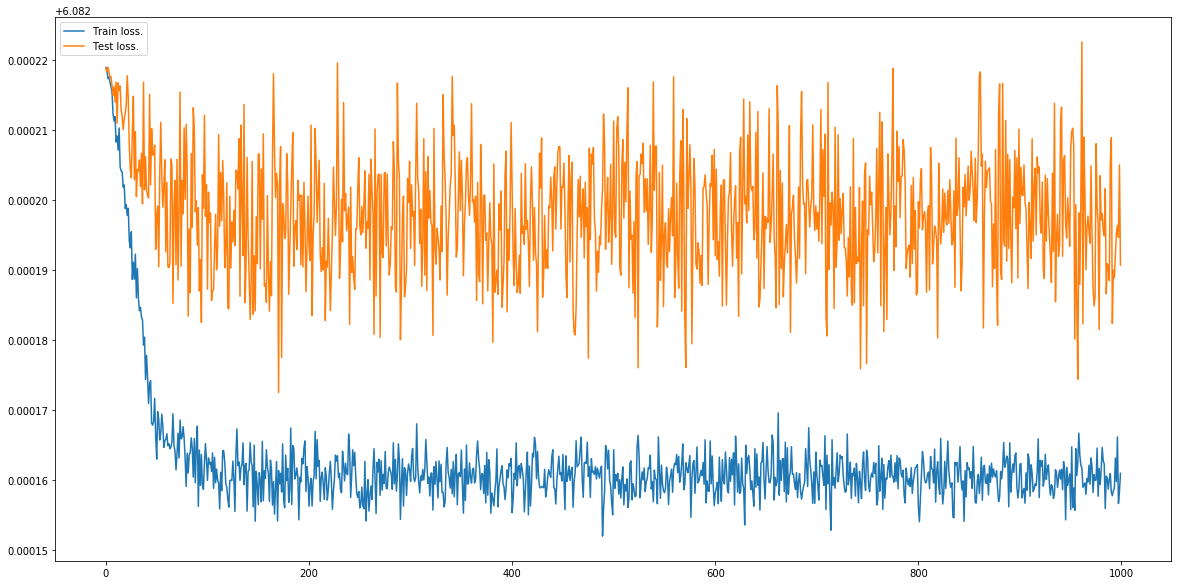

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(vectorizable_token.auto_encoder.verificatable_result.logs_df.train_loss, label="Train loss.")
plt.plot(vectorizable_token.auto_encoder.verificatable_result.logs_df.test_loss, label="Test loss.")
plt.legend()
plt.show()

In [13]:
vector_list = vectorizable_token.vectorize(token_list=token_arr.tolist())
vector_arr = np.array(vector_list)

In [14]:
seq_len = 5

In [15]:
observed_list = []
for i in range(seq_len, vector_arr.shape[0]):
    observed_list.append(vector_arr[i-seq_len:i])
observed_arr = np.array(observed_list)
observed_arr.shape

(740, 5, 500)

In [23]:
abstractable_semantics = ReSeq2Seq(
    margin_param=0.01,
    retrospective_lambda=0.5,
    retrospective_eta=0.5,
    encoder_decoder_controller=None,
    retrospective_encoder=None,
    input_neuron_count=observed_arr.shape[-1],
    hidden_neuron_count=500,
    weight_limit=1e+10,
    dropout_rate=0.5,
    pre_learning_epochs=1000,
    epochs=1000,
    batch_size=20,
    learning_rate=1e-02,
    learning_attenuate_rate=1.0,
    attenuate_epoch=50,
    seq_len=seq_len,
    bptt_tau=seq_len,
    test_size_rate=0.3,
    tol=0.0
)

In [24]:
observed_arr.shape

(740, 5, 500)

In [25]:
abstractable_semantics.learn(observed_arr=observed_arr, target_arr=observed_arr)

Best params are updated.
Epoch: 1
Loss: 
Training: 0.0003051126118650729 Test: 0.00016391292436032084
Epoch: 2
Loss: 
Training: 0.0003104901367455128 Test: 0.00015858388965375812
Best params are updated.
Epoch: 3
Loss: 
Training: 0.00030177666031225796 Test: 0.00015758949704132333
Best params are updated.
Epoch: 4
Loss: 
Training: 0.00040166107922300575 Test: 0.0001562130578114987
Epoch: 5
Loss: 
Training: 0.00035190749170493403 Test: 0.00015694216199880088
Epoch: 6
Loss: 
Training: 0.00033559434623891285 Test: 0.0001550140287337037
Epoch: 7
Loss: 
Training: 0.0002938760295101444 Test: 0.00015338088329604438
Epoch: 8
Loss: 
Training: 0.0003517899039036154 Test: 0.00015692596378154712
Epoch: 9
Loss: 
Training: 0.0003224843845130228 Test: 0.00015744348110861023
Epoch: 10
Loss: 
Training: 0.0003189247944170446 Test: 0.00015113218348177093
Epoch: 11
Loss: 
Training: 0.0003584477115729726 Test: 0.00015229120430036816
Rolling mean of Loss (Window is 10): 
Training: 0.0003293617438433524 Test

Rolling mean of Loss (Window is 10): 
Training: 0.0003407137780634747 Test: 0.00015374867185961692
Epoch: 53
Loss: 
Training: 0.00025202664235921506 Test: 0.00015386811711130604
Rolling mean of Loss (Window is 10): 
Training: 0.0003392796398165545 Test: 0.00015356258570886587
Epoch: 54
Loss: 
Training: 0.00025618231676889435 Test: 0.00015421097923981844
Rolling mean of Loss (Window is 10): 
Training: 0.00033370097257925046 Test: 0.0001537256096804977
Epoch: 55
Loss: 
Training: 0.00028864431344840374 Test: 0.00015328817626818965
Rolling mean of Loss (Window is 10): 
Training: 0.0003274251598430822 Test: 0.00015383074245817286
Epoch: 56
Loss: 
Training: 0.0003800409369874819 Test: 0.00015606466678202594
Rolling mean of Loss (Window is 10): 
Training: 0.00031977332869651193 Test: 0.00015345465541650527
Epoch: 57
Loss: 
Training: 0.0002823923635218289 Test: 0.00015335867614055284
Rolling mean of Loss (Window is 10): 
Training: 0.00031934213313300486 Test: 0.00015375952669938837
Epoch: 58
L

Training: 0.00034117280858883856 Test: 0.00015147377208738795
Epoch: 99
Loss: 
Training: 0.0003078895522191096 Test: 0.00015390765742093855
Rolling mean of Loss (Window is 10): 
Training: 0.00034344320027558775 Test: 0.00015182560990345328
Epoch: 100
Loss: 
Training: 0.0002722529588821108 Test: 0.00015081259453166585
Rolling mean of Loss (Window is 10): 
Training: 0.0003315470815722656 Test: 0.0001522940369838232
Epoch: 101
Loss: 
Training: 0.00029266266793312934 Test: 0.00015200962400026448
Rolling mean of Loss (Window is 10): 
Training: 0.0003315856778802074 Test: 0.00015240205418017087
Epoch: 102
Loss: 
Training: 0.00037945892093630654 Test: 0.00015148373739920433
Rolling mean of Loss (Window is 10): 
Training: 0.00032442502291981946 Test: 0.00015220693596202807
Best params are updated.
Epoch: 103
Loss: 
Training: 0.0004065763436034133 Test: 0.00015167076010077902
Rolling mean of Loss (Window is 10): 
Training: 0.00032184711266036584 Test: 0.00015207153795234477
Epoch: 104
Loss: 
Tr

Training: 0.00033465869356927704 Test: 0.00015083483003745318
Epoch: 145
Loss: 
Training: 0.0003715878379050185 Test: 0.00014960283519630633
Rolling mean of Loss (Window is 10): 
Training: 0.0003293799423228654 Test: 0.0001513070846615394
Epoch: 146
Loss: 
Training: 0.00036242831958982534 Test: 0.00014801914551500008
Rolling mean of Loss (Window is 10): 
Training: 0.00032906620552490735 Test: 0.0001511385731887775
Epoch: 147
Loss: 
Training: 0.0003610480887994096 Test: 0.00015087868575674928
Rolling mean of Loss (Window is 10): 
Training: 0.00033295003029327726 Test: 0.0001508308907998103
Epoch: 148
Loss: 
Training: 0.0003316811567086175 Test: 0.00014989634824098634
Rolling mean of Loss (Window is 10): 
Training: 0.0003405362867269592 Test: 0.00015071825593903596
Epoch: 149
Loss: 
Training: 0.0003096902922747756 Test: 0.00014833677423206864
Rolling mean of Loss (Window is 10): 
Training: 0.00034361585033932816 Test: 0.00015074030824946324
Epoch: 150
Loss: 
Training: 0.00033730715873228

Training: 0.00033337239787761266 Test: 0.00014995303767106828
Epoch: 191
Loss: 
Training: 0.0003550147436778205 Test: 0.00015178973362839454
Rolling mean of Loss (Window is 10): 
Training: 0.0003359677537141646 Test: 0.00014958650973192702
Epoch: 192
Loss: 
Training: 0.00034504253194006426 Test: 0.00015017004081217317
Rolling mean of Loss (Window is 10): 
Training: 0.00033227824501954906 Test: 0.000149949395490467
Epoch: 193
Loss: 
Training: 0.00029595839422328995 Test: 0.00014790615032594993
Rolling mean of Loss (Window is 10): 
Training: 0.0003372855305095365 Test: 0.00014993284570769937
Epoch: 194
Loss: 
Training: 0.0003594147825494241 Test: 0.000151120760973881
Rolling mean of Loss (Window is 10): 
Training: 0.0003318018539898133 Test: 0.00014997018049886545
Epoch: 195
Loss: 
Training: 0.0003239454849777978 Test: 0.00015165581433358098
Rolling mean of Loss (Window is 10): 
Training: 0.0003364333834777527 Test: 0.00015006048887194768
Epoch: 196
Loss: 
Training: 0.0002636188564136095

Training: 0.00033926225692442103 Test: 0.00014776152188559843
Epoch: 237
Loss: 
Training: 0.00032331522544434106 Test: 0.00014541346040099085
Rolling mean of Loss (Window is 10): 
Training: 0.00033503373408006474 Test: 0.0001481960314483373
Epoch: 238
Loss: 
Training: 0.00034600717313915667 Test: 0.00014498457902436973
Rolling mean of Loss (Window is 10): 
Training: 0.00033361523001078646 Test: 0.00014805365423877192
Epoch: 239
Loss: 
Training: 0.00027665413734817237 Test: 0.00014546742810938346
Rolling mean of Loss (Window is 10): 
Training: 0.0003276520678079358 Test: 0.00014743327029018648
Epoch: 240
Loss: 
Training: 0.00025382308859975066 Test: 0.0001510014561743294
Rolling mean of Loss (Window is 10): 
Training: 0.0003274534953918178 Test: 0.00014705762728573467
Epoch: 241
Loss: 
Training: 0.00032877380960629415 Test: 0.0001467094559827596
Rolling mean of Loss (Window is 10): 
Training: 0.0003247056334099499 Test: 0.00014733136139347244
Epoch: 242
Loss: 
Training: 0.00038495325702

Training: 0.0003532957372971542 Test: 0.00014415854064373255
Epoch: 283
Loss: 
Training: 0.0002992861777677297 Test: 0.00014544616264897898
Rolling mean of Loss (Window is 10): 
Training: 0.00034760891143175603 Test: 0.00014392775600579645
Epoch: 284
Loss: 
Training: 0.00030243790776043455 Test: 0.0001448065276566267
Rolling mean of Loss (Window is 10): 
Training: 0.0003468001278514497 Test: 0.00014445584918142137
Epoch: 285
Loss: 
Training: 0.0002828040849960962 Test: 0.00014396755711303924
Rolling mean of Loss (Window is 10): 
Training: 0.00034292525533758446 Test: 0.0001445243080752571
Epoch: 286
Loss: 
Training: 0.00034374086326843535 Test: 0.00014404177906864927
Rolling mean of Loss (Window is 10): 
Training: 0.00032839696544122236 Test: 0.00014463833916787314
Epoch: 287
Loss: 
Training: 0.0003368975932442083 Test: 0.00014469464125725526
Rolling mean of Loss (Window is 10): 
Training: 0.0003263382259626673 Test: 0.00014447728449756942
Epoch: 288
Loss: 
Training: 0.0003656602046965

Training: 0.00034200371549944155 Test: 0.00013995005192531733
Epoch: 329
Loss: 
Training: 0.0003380115839953418 Test: 0.0001388368659042829
Rolling mean of Loss (Window is 10): 
Training: 0.0003436109456844644 Test: 0.00014008568525918655
Epoch: 330
Loss: 
Training: 0.00032735914691497996 Test: 0.00014174831400943082
Rolling mean of Loss (Window is 10): 
Training: 0.0003362823354328882 Test: 0.00013971353789476095
Epoch: 331
Loss: 
Training: 0.0003055285260368203 Test: 0.00014271227738423906
Rolling mean of Loss (Window is 10): 
Training: 0.0003302588027106855 Test: 0.0001397462285691191
Epoch: 332
Loss: 
Training: 0.0003220348326263356 Test: 0.00014222613690222522
Rolling mean of Loss (Window is 10): 
Training: 0.00033511747040089885 Test: 0.00014031110509623245
Epoch: 333
Loss: 
Training: 0.0003212372005060976 Test: 0.00013944422388408078
Rolling mean of Loss (Window is 10): 
Training: 0.0003340797502791817 Test: 0.00014034160843671002
Epoch: 334
Loss: 
Training: 0.000324266345719402

Training: 0.0003245631858510444 Test: 0.00013837333461915323
Epoch: 375
Loss: 
Training: 0.000376335574092466 Test: 0.00013992670275661192
Rolling mean of Loss (Window is 10): 
Training: 0.00032459169990768394 Test: 0.00013829090975465698
Epoch: 376
Loss: 
Training: 0.0003279375103475406 Test: 0.000137453980132247
Rolling mean of Loss (Window is 10): 
Training: 0.0003282848060149794 Test: 0.0001386114856067311
Epoch: 377
Loss: 
Training: 0.00036647436613776116 Test: 0.00013998667339513516
Rolling mean of Loss (Window is 10): 
Training: 0.0003362753378214911 Test: 0.0001383764158891806
Epoch: 378
Loss: 
Training: 0.00026207362695118285 Test: 0.00013442177730830097
Rolling mean of Loss (Window is 10): 
Training: 0.0003372861200642265 Test: 0.00013865557056012262
Epoch: 379
Loss: 
Training: 0.0003561656928360602 Test: 0.00013692737589124623
Rolling mean of Loss (Window is 10): 
Training: 0.0003271337847051193 Test: 0.0001383465355376154
Epoch: 380
Loss: 
Training: 0.0002792452453341275 Te

Training: 0.0003087881072041394 Test: 0.00013677961071018282
Epoch: 421
Loss: 
Training: 0.0003542013817675647 Test: 0.00013382954081302362
Rolling mean of Loss (Window is 10): 
Training: 0.00032677113534658063 Test: 0.00013710418344219208
Epoch: 422
Loss: 
Training: 0.00027813343282145605 Test: 0.00013442903822098455
Rolling mean of Loss (Window is 10): 
Training: 0.00033231673278373856 Test: 0.0001371645704733818
Epoch: 423
Loss: 
Training: 0.0003533493882660904 Test: 0.00013852433049395496
Rolling mean of Loss (Window is 10): 
Training: 0.0003319375031308277 Test: 0.0001369288626983007
Epoch: 424
Loss: 
Training: 0.0003668441020851378 Test: 0.00013795712639603502
Rolling mean of Loss (Window is 10): 
Training: 0.00033025374833938067 Test: 0.00013692298822733724
Epoch: 425
Loss: 
Training: 0.0003577222627268649 Test: 0.00013659784225936332
Rolling mean of Loss (Window is 10): 
Training: 0.00034137443445274535 Test: 0.0001372504491347495
Epoch: 426
Loss: 
Training: 0.00031832922500379

Training: 0.0003347611892433356 Test: 0.0001342291719661492
Epoch: 467
Loss: 
Training: 0.00034001931431469027 Test: 0.00013309946876836025
Rolling mean of Loss (Window is 10): 
Training: 0.00033046130299900316 Test: 0.0001343125460473017
Epoch: 468
Loss: 
Training: 0.0003600961433741372 Test: 0.00013144907000190795
Rolling mean of Loss (Window is 10): 
Training: 0.00032712489411001967 Test: 0.0001342056672988537
Epoch: 469
Loss: 
Training: 0.00032748869153967185 Test: 0.00013420693784217195
Rolling mean of Loss (Window is 10): 
Training: 0.0003258782346228149 Test: 0.00013386466379382988
Epoch: 470
Loss: 
Training: 0.00031214140661684815 Test: 0.0001342825580547289
Rolling mean of Loss (Window is 10): 
Training: 0.00032087242977978163 Test: 0.00013383828743206955
Epoch: 471
Loss: 
Training: 0.0003854098219857302 Test: 0.000131645732043241
Rolling mean of Loss (Window is 10): 
Training: 0.0003264472777482778 Test: 0.00013366078336307953
Epoch: 472
Loss: 
Training: 0.0002832911381709445

Training: 0.0003534370698901149 Test: 0.0001315659919863098
Epoch: 513
Loss: 
Training: 0.00035233915081285945 Test: 0.0001328375975473827
Rolling mean of Loss (Window is 10): 
Training: 0.00035217945705936956 Test: 0.00013168501136283072
Epoch: 514
Loss: 
Training: 0.00028198880782191244 Test: 0.00012883139491743536
Rolling mean of Loss (Window is 10): 
Training: 0.00034369367995905917 Test: 0.00013197501602938322
Epoch: 515
Loss: 
Training: 0.00034728975364281724 Test: 0.00013209667412543072
Rolling mean of Loss (Window is 10): 
Training: 0.00033344066850092796 Test: 0.00013160268958935174
Epoch: 516
Loss: 
Training: 0.00029557716610055767 Test: 0.00013106518470474911
Rolling mean of Loss (Window is 10): 
Training: 0.0003345018333836983 Test: 0.00013152333232511183
Epoch: 517
Loss: 
Training: 0.0002469918533588188 Test: 0.00013160397707623686
Rolling mean of Loss (Window is 10): 
Training: 0.00032720240689875846 Test: 0.00013122672611136165
Epoch: 518
Loss: 
Training: 0.0002866831727

Training: 0.0003234824578332428 Test: 0.00012974118606012141
Epoch: 559
Loss: 
Training: 0.00029016988638569293 Test: 0.00013080282290321287
Rolling mean of Loss (Window is 10): 
Training: 0.0003321610269033783 Test: 0.00012994989261976266
Epoch: 560
Loss: 
Training: 0.0003490018146768242 Test: 0.00013040053974170313
Rolling mean of Loss (Window is 10): 
Training: 0.000317999079461003 Test: 0.00012989713276019424
Epoch: 561
Loss: 
Training: 0.0003653689476669932 Test: 0.00013001865151485923
Rolling mean of Loss (Window is 10): 
Training: 0.0003255869993859856 Test: 0.00012997450880746316
Epoch: 562
Loss: 
Training: 0.0003066156451662589 Test: 0.00013111978669689035
Rolling mean of Loss (Window is 10): 
Training: 0.0003336471251074853 Test: 0.00013000589077951093
Epoch: 563
Loss: 
Training: 0.0003200170102847596 Test: 0.00012927332901935335
Rolling mean of Loss (Window is 10): 
Training: 0.0003300265464271474 Test: 0.00013008781075281344
Epoch: 564
Loss: 
Training: 0.0003026749084578658

Epoch: 605
Loss: 
Training: 0.0003333744320911901 Test: 0.00012768317973593015
Rolling mean of Loss (Window is 10): 
Training: 0.0003399892594955637 Test: 0.0001281116353515723
Epoch: 606
Loss: 
Training: 0.0002839470800056474 Test: 0.00012812035984371666
Rolling mean of Loss (Window is 10): 
Training: 0.00034005873306530504 Test: 0.00012806012724631574
Epoch: 607
Loss: 
Training: 0.0003648579683979083 Test: 0.0001284199480635039
Rolling mean of Loss (Window is 10): 
Training: 0.00033549511161982986 Test: 0.0001281683063942139
Epoch: 608
Loss: 
Training: 0.00041259868799387896 Test: 0.00012991913147678284
Rolling mean of Loss (Window is 10): 
Training: 0.00034022950679796666 Test: 0.00012811268535937697
Epoch: 609
Loss: 
Training: 0.0003812865520926115 Test: 0.00012893453274690086
Rolling mean of Loss (Window is 10): 
Training: 0.00034499478993099973 Test: 0.00012822757009008017
Epoch: 610
Loss: 
Training: 0.00030682342176127056 Test: 0.00012759159450091375
Rolling mean of Loss (Window

Epoch: 651
Loss: 
Training: 0.00023397078726794334 Test: 0.00012208302438481203
Rolling mean of Loss (Window is 10): 
Training: 0.00034263121822974746 Test: 0.00012491817932924076
Epoch: 652
Loss: 
Training: 0.0003305597906084237 Test: 0.00012731532832647093
Rolling mean of Loss (Window is 10): 
Training: 0.0003280242052881178 Test: 0.00012488718751496597
Epoch: 653
Loss: 
Training: 0.00033288050260538827 Test: 0.00012638341571978852
Rolling mean of Loss (Window is 10): 
Training: 0.0003328100957766671 Test: 0.00012520072223035718
Epoch: 654
Loss: 
Training: 0.00032445076032574713 Test: 0.00012630194956576816
Rolling mean of Loss (Window is 10): 
Training: 0.0003341120903633897 Test: 0.00012514798313970234
Epoch: 655
Loss: 
Training: 0.00029500083091001626 Test: 0.0001241241921876201
Rolling mean of Loss (Window is 10): 
Training: 0.00034132332658683883 Test: 0.00012522744757963606
Epoch: 656
Loss: 
Training: 0.00039180888062287323 Test: 0.00012551559184639446
Rolling mean of Loss (Win

Epoch: 697
Loss: 
Training: 0.0003045785713317699 Test: 0.00012500413497145845
Rolling mean of Loss (Window is 10): 
Training: 0.0003220897615636751 Test: 0.00012460983582787295
Epoch: 698
Loss: 
Training: 0.0003413608094001062 Test: 0.00012392473297686527
Rolling mean of Loss (Window is 10): 
Training: 0.0003109118860621924 Test: 0.0001245519551222171
Epoch: 699
Loss: 
Training: 0.000325848296667181 Test: 0.00012644139785758515
Rolling mean of Loss (Window is 10): 
Training: 0.00031081596444733724 Test: 0.0001244390069568386
Epoch: 700
Loss: 
Training: 0.00030546389147125485 Test: 0.00012391415943649217
Rolling mean of Loss (Window is 10): 
Training: 0.00031082581724757813 Test: 0.00012478103331799953
Epoch: 701
Loss: 
Training: 0.0002782464237558078 Test: 0.0001253306200740135
Rolling mean of Loss (Window is 10): 
Training: 0.00031217258764799205 Test: 0.00012458889882094475
Epoch: 702
Loss: 
Training: 0.00032850691012584877 Test: 0.00012200587423478321
Rolling mean of Loss (Window i

Epoch: 743
Loss: 
Training: 0.00036434000072409136 Test: 0.00012296652135322528
Rolling mean of Loss (Window is 10): 
Training: 0.00031009582627897035 Test: 0.00012329785194896818
Epoch: 744
Loss: 
Training: 0.00034547055483988954 Test: 0.00012603586160808285
Rolling mean of Loss (Window is 10): 
Training: 0.00031551058459644826 Test: 0.0001233750304629666
Epoch: 745
Loss: 
Training: 0.00042803424310843604 Test: 0.0001246117007705838
Rolling mean of Loss (Window is 10): 
Training: 0.00031476674255493975 Test: 0.00012368801441973564
Epoch: 746
Loss: 
Training: 0.00035802283094903337 Test: 0.00012219783430289047
Rolling mean of Loss (Window is 10): 
Training: 0.0003284005161641549 Test: 0.00012366301623537552
Epoch: 747
Loss: 
Training: 0.0003533485261505046 Test: 0.00012351540443662933
Rolling mean of Loss (Window is 10): 
Training: 0.0003297819216269861 Test: 0.00012362801447976624
Epoch: 748
Loss: 
Training: 0.0002741302562777444 Test: 0.0001240764334629924
Rolling mean of Loss (Windo

Epoch: 789
Loss: 
Training: 0.00035467995404500494 Test: 0.00012241962838203358
Rolling mean of Loss (Window is 10): 
Training: 0.00032332031408283996 Test: 0.0001208887485447916
Epoch: 790
Loss: 
Training: 0.00034266429162892854 Test: 0.00012275917194648264
Rolling mean of Loss (Window is 10): 
Training: 0.00032437390475653 Test: 0.00012092567307902765
Epoch: 791
Loss: 
Training: 0.00029416883610367824 Test: 0.0001219408551348526
Rolling mean of Loss (Window is 10): 
Training: 0.00032275287896094086 Test: 0.00012095688489074745
Epoch: 792
Loss: 
Training: 0.00028898068645729524 Test: 0.00012286008200618984
Rolling mean of Loss (Window is 10): 
Training: 0.00031753242449634084 Test: 0.00012107674206353415
Epoch: 793
Loss: 
Training: 0.00027117844440300876 Test: 0.00011805263906785838
Rolling mean of Loss (Window is 10): 
Training: 0.00031487300259128517 Test: 0.00012127021928894691
Epoch: 794
Loss: 
Training: 0.00032467326976340084 Test: 0.00011986896582378305
Rolling mean of Loss (Win

Epoch: 835
Loss: 
Training: 0.0003664315135409591 Test: 0.00012249527365830904
Rolling mean of Loss (Window is 10): 
Training: 0.0003441115591011043 Test: 0.00012063138421732652
Epoch: 836
Loss: 
Training: 0.0003248100816453725 Test: 0.00012011089940002157
Rolling mean of Loss (Window is 10): 
Training: 0.00034664924975740235 Test: 0.00012103816113906421
Epoch: 837
Loss: 
Training: 0.0003905899057836978 Test: 0.00011984579680382892
Rolling mean of Loss (Window is 10): 
Training: 0.0003449422831716855 Test: 0.00012086683966560335
Epoch: 838
Loss: 
Training: 0.0002780987182065483 Test: 0.0001241052241584587
Rolling mean of Loss (Window is 10): 
Training: 0.0003515349758698392 Test: 0.00012048141630076575
Epoch: 839
Loss: 
Training: 0.000407760214890516 Test: 0.00012086481119901299
Rolling mean of Loss (Window is 10): 
Training: 0.0003507822097973298 Test: 0.00012076265034112621
Epoch: 840
Loss: 
Training: 0.00032395978479293644 Test: 0.00012023400566149178
Rolling mean of Loss (Window is

Epoch: 881
Loss: 
Training: 0.0003378873315611478 Test: 0.00011608769299096488
Rolling mean of Loss (Window is 10): 
Training: 0.00030188929754867164 Test: 0.00011868573743623178
Epoch: 882
Loss: 
Training: 0.0003176699347670424 Test: 0.00012162781695938738
Rolling mean of Loss (Window is 10): 
Training: 0.000298995042332093 Test: 0.00011833174720595887
Epoch: 883
Loss: 
Training: 0.0003131663674800639 Test: 0.00011818638993061111
Rolling mean of Loss (Window is 10): 
Training: 0.00030104876070101763 Test: 0.00011872790547917331
Epoch: 884
Loss: 
Training: 0.0003945784603164847 Test: 0.00011903630481908243
Rolling mean of Loss (Window is 10): 
Training: 0.0003000986812208324 Test: 0.00011856301239642774
Epoch: 885
Loss: 
Training: 0.0003568079326514447 Test: 0.00011829295608921202
Rolling mean of Loss (Window is 10): 
Training: 0.00031190421663819897 Test: 0.00011859230982826002
Epoch: 886
Loss: 
Training: 0.0003687855027301303 Test: 0.00011774053477999751
Rolling mean of Loss (Window 

Epoch: 927
Loss: 
Training: 0.0002731704219801182 Test: 0.0001190547247515746
Rolling mean of Loss (Window is 10): 
Training: 0.00034159266064901595 Test: 0.00011837647715831153
Epoch: 928
Loss: 
Training: 0.0003153590135987531 Test: 0.00011918143768732902
Rolling mean of Loss (Window is 10): 
Training: 0.00033537179296240667 Test: 0.00011846808155862723
Epoch: 929
Loss: 
Training: 0.00033948912501306387 Test: 0.00011824469010061369
Rolling mean of Loss (Window is 10): 
Training: 0.000331423500271369 Test: 0.0001186579128773675
Epoch: 930
Loss: 
Training: 0.0003118631464339514 Test: 0.00011751903071699877
Rolling mean of Loss (Window is 10): 
Training: 0.0003329093575794995 Test: 0.00011860928849351223
Epoch: 931
Loss: 
Training: 0.00040282035141382254 Test: 0.00011763307775060587
Rolling mean of Loss (Window is 10): 
Training: 0.0003243676483632459 Test: 0.00011850611378781887
Epoch: 932
Loss: 
Training: 0.0003734115894594408 Test: 0.00011725379997414972
Rolling mean of Loss (Window i

Epoch: 973
Loss: 
Training: 0.0003175437314577882 Test: 0.0001161473689256173
Rolling mean of Loss (Window is 10): 
Training: 0.0003096085497898345 Test: 0.0001170392359842424
Epoch: 974
Loss: 
Training: 0.00030956384135399825 Test: 0.00011490923838382372
Rolling mean of Loss (Window is 10): 
Training: 0.0003083533042759378 Test: 0.00011704863379094917
Epoch: 975
Loss: 
Training: 0.00033954161500767825 Test: 0.00011570236831517159
Rolling mean of Loss (Window is 10): 
Training: 0.00030560850215544127 Test: 0.00011694796237379711
Epoch: 976
Loss: 
Training: 0.000320412079919039 Test: 0.00011571247322606473
Rolling mean of Loss (Window is 10): 
Training: 0.00030682655004455207 Test: 0.00011677827944955711
Epoch: 977
Loss: 
Training: 0.00029814134938248283 Test: 0.00011558174390786953
Rolling mean of Loss (Window is 10): 
Training: 0.00030645464021374525 Test: 0.00011655117434521572
Epoch: 978
Loss: 
Training: 0.0003218549655196912 Test: 0.00011742604946627324
Rolling mean of Loss (Window

Epoch: 45
Loss: 
Training: 3.747521292404302 Test: 3.6012246704668556
Epoch: 46
Loss: 
Training: 3.709835476667515 Test: 3.6537382620047363
Epoch: 47
Loss: 
Training: 3.6959574521060508 Test: 3.6429214124979743
Epoch: 48
Loss: 
Training: 3.7245879483356834 Test: 3.618943548674052
Epoch: 49
Loss: 
Training: 3.714631511051375 Test: 3.6027465018008007
Best params are updated.
Epoch: 50
Loss: 
Training: 3.6449612176639565 Test: 3.609032120429754
Epoch: 51
Loss: 
Training: 3.726065635970799 Test: 3.625558059735632
Epoch: 52
Loss: 
Training: 3.76888564510583 Test: 3.6434865034677206
Epoch: 53
Loss: 
Training: 3.74149950289268 Test: 3.6230491914454412
Epoch: 54
Loss: 
Training: 3.680406560308829 Test: 3.623320359814255
Epoch: 55
Loss: 
Training: 3.784580821892653 Test: 3.643262158363983
Epoch: 56
Loss: 
Training: 3.7496701876808416 Test: 3.5875783299361963
Epoch: 57
Loss: 
Training: 3.6888134248892026 Test: 3.6101310362436694
Epoch: 58
Loss: 
Training: 3.7228449262089325 Test: 3.6075344915207

Epoch: 161
Loss: 
Training: 3.7936305020397536 Test: 3.791840692335602
Epoch: 162
Loss: 
Training: 3.783342619292584 Test: 3.809012626390627
Epoch: 163
Loss: 
Training: 3.7247741534205994 Test: 3.7681255513124343
Epoch: 164
Loss: 
Training: 3.7316171964965266 Test: 3.7711017199300754
Epoch: 165
Loss: 
Training: 3.743383101762333 Test: 3.8063387906746775
Epoch: 166
Loss: 
Training: 3.7326029113676533 Test: 3.758243376680166
Epoch: 167
Loss: 
Training: 3.7755608537608434 Test: 3.786287409003488
Epoch: 168
Loss: 
Training: 3.739713084370768 Test: 3.7913375776288647
Epoch: 169
Loss: 
Training: 3.7641579455092136 Test: 3.785125074837082
Epoch: 170
Loss: 
Training: 3.752967783087233 Test: 3.831229965384063
Epoch: 171
Loss: 
Training: 3.708174025651447 Test: 3.7869159732022015
Epoch: 172
Loss: 
Training: 3.7275282443426874 Test: 3.8030437104056105
Epoch: 173
Loss: 
Training: 3.7857786677584673 Test: 3.7724851603505174
Epoch: 174
Loss: 
Training: 3.6953718602175916 Test: 3.7923392887077525
Epo

Training: 3.7148342309069804 Test: 3.6252096048774525
Epoch: 276
Loss: 
Training: 3.7073282624512207 Test: 3.6339985694796817
Epoch: 277
Loss: 
Training: 3.750336871702301 Test: 3.5854731743905006
Epoch: 278
Loss: 
Training: 3.7536456955523985 Test: 3.5807249932400933
Epoch: 279
Loss: 
Training: 3.655661755408567 Test: 3.6249462512793573
Epoch: 280
Loss: 
Training: 3.767238728729736 Test: 3.605009941637898
Epoch: 281
Loss: 
Training: 3.692969083628965 Test: 3.6343196029770577
Epoch: 282
Loss: 
Training: 3.7446722557383576 Test: 3.6390996672313722
Epoch: 283
Loss: 
Training: 3.6937042699463363 Test: 3.5729635677049227
Epoch: 284
Loss: 
Training: 3.7324086005289665 Test: 3.6331899308982383
Epoch: 285
Loss: 
Training: 3.7311844176694935 Test: 3.5273186284071265
Epoch: 286
Loss: 
Training: 3.7603982285095996 Test: 3.6380396436963727
Epoch: 287
Loss: 
Training: 3.749549656188921 Test: 3.557119146266625
Epoch: 288
Loss: 
Training: 3.682425648612692 Test: 3.5646965975376625
Epoch: 289
Loss: 


Epoch: 391
Loss: 
Training: 3.6728056483069236 Test: 3.453496063160411
Epoch: 392
Loss: 
Training: 3.698048357062341 Test: 3.4566449670060595
Epoch: 393
Loss: 
Training: 3.657737708902044 Test: 3.5057850521474307
Epoch: 394
Loss: 
Training: 3.57702165868222 Test: 3.5057312939618437
Epoch: 395
Loss: 
Training: 3.7993288127263996 Test: 3.448988436459786
Epoch: 396
Loss: 
Training: 3.733298582654516 Test: 3.502806633489076
Epoch: 397
Loss: 
Training: 3.735225063809883 Test: 3.4369565628894954
Epoch: 398
Loss: 
Training: 3.652476639395582 Test: 3.4689102196947306
Epoch: 399
Loss: 
Training: 3.6266185527467716 Test: 3.4539548863270184
Epoch: 400
Loss: 
Training: 3.771648792054955 Test: 3.5236130499833056
Epoch: 401
Loss: 
Training: 3.726005260909899 Test: 3.4786311527933385
Epoch: 402
Loss: 
Training: 3.693970100169056 Test: 3.467888126553037
Epoch: 403
Loss: 
Training: 3.6953205353637206 Test: 3.4947462304146857
Epoch: 404
Loss: 
Training: 3.66886831849674 Test: 3.4543950557517453
Epoch: 4

Epoch: 507
Loss: 
Training: 3.618323762759302 Test: 3.4139884182148483
Epoch: 508
Loss: 
Training: 3.744065547417816 Test: 3.4041484836968046
Epoch: 509
Loss: 
Training: 3.7529718472998606 Test: 3.441691388805543
Epoch: 510
Loss: 
Training: 3.637883679281051 Test: 3.4255779087114573
Epoch: 511
Loss: 
Training: 3.689804716545248 Test: 3.4412178488471836
Epoch: 512
Loss: 
Training: 3.6977227776785866 Test: 3.3891089922442976
Epoch: 513
Loss: 
Training: 3.6664905927025777 Test: 3.4747196049845854
Epoch: 514
Loss: 
Training: 3.7313142490360054 Test: 3.4048160651443315
Epoch: 515
Loss: 
Training: 3.712404115326577 Test: 3.3698279357899317
Epoch: 516
Loss: 
Training: 3.661123416951297 Test: 3.4584990535761944
Epoch: 517
Loss: 
Training: 3.582906913656651 Test: 3.396733760079721
Epoch: 518
Loss: 
Training: 3.6949641382213736 Test: 3.3963158450703363
Epoch: 519
Loss: 
Training: 3.6742066041836083 Test: 3.4009230453864463
Epoch: 520
Loss: 
Training: 3.625636187661316 Test: 3.4480166990567755
Ep

Epoch: 623
Loss: 
Training: 3.6831729036886816 Test: 3.407038790789262
Epoch: 624
Loss: 
Training: 3.6723310170676973 Test: 3.3639422672227597
Epoch: 625
Loss: 
Training: 3.7169801545561767 Test: 3.40495074627593
Epoch: 626
Loss: 
Training: 3.685378023401329 Test: 3.364641818917397
Epoch: 627
Loss: 
Training: 3.7059718279773772 Test: 3.368268577940677
Epoch: 628
Loss: 
Training: 3.6759199958575364 Test: 3.3815019345534547
Epoch: 629
Loss: 
Training: 3.735764972253712 Test: 3.419896413159999
Epoch: 630
Loss: 
Training: 3.7173555211227045 Test: 3.380547312263779
Epoch: 631
Loss: 
Training: 3.709982842991372 Test: 3.381741645232584
Epoch: 632
Loss: 
Training: 3.612182250847718 Test: 3.380671694900832
Epoch: 633
Loss: 
Training: 3.6205074042949934 Test: 3.3597403842552485
Epoch: 634
Loss: 
Training: 3.689268362279093 Test: 3.3705435483368906
Epoch: 635
Loss: 
Training: 3.6850617914994945 Test: 3.4107107788229745
Epoch: 636
Loss: 
Training: 3.672981625826295 Test: 3.367066468236211
Epoch: 6

Epoch: 738
Loss: 
Training: 3.6395111855457327 Test: 3.3290035044823187
Epoch: 739
Loss: 
Training: 3.696352886689913 Test: 3.3914217204906936
Epoch: 740
Loss: 
Training: 3.698715594925971 Test: 3.3669500123961678
Epoch: 741
Loss: 
Training: 3.69890959861774 Test: 3.3259419090604068
Epoch: 742
Loss: 
Training: 3.693490884832098 Test: 3.3421507605036576
Epoch: 743
Loss: 
Training: 3.686815929315982 Test: 3.3330850151531544
Epoch: 744
Loss: 
Training: 3.6979769623296295 Test: 3.387722783744255
Epoch: 745
Loss: 
Training: 3.661000428448125 Test: 3.364367466959787
Epoch: 746
Loss: 
Training: 3.7142429592435016 Test: 3.3488416572526045
Epoch: 747
Loss: 
Training: 3.640548392092681 Test: 3.351058051695965
Epoch: 748
Loss: 
Training: 3.7060147659663256 Test: 3.3107372000269826
Epoch: 749
Loss: 
Training: 3.677762489848712 Test: 3.3321844727589407
Epoch: 750
Loss: 
Training: 3.697495191434663 Test: 3.355378732766311
Epoch: 751
Loss: 
Training: 3.6674365359250882 Test: 3.382504239504077
Epoch: 

Epoch: 854
Loss: 
Training: 3.6820378831980247 Test: 3.378396198961636
Epoch: 855
Loss: 
Training: 3.6806995872589834 Test: 3.3284661362800443
Epoch: 856
Loss: 
Training: 3.719456781340841 Test: 3.366664439662962
Epoch: 857
Loss: 
Training: 3.693964367417618 Test: 3.3819837798766716
Epoch: 858
Loss: 
Training: 3.6526659217072104 Test: 3.3799691332809236
Epoch: 859
Loss: 
Training: 3.671059770594435 Test: 3.371323547740477
Epoch: 860
Loss: 
Training: 3.663390368041895 Test: 3.3834364760304028
Epoch: 861
Loss: 
Training: 3.62960716460951 Test: 3.3512864234452504
Epoch: 862
Loss: 
Training: 3.686512431325062 Test: 3.356138740907791
Epoch: 863
Loss: 
Training: 3.713166706602336 Test: 3.376302945993802
Epoch: 864
Loss: 
Training: 3.699075561467266 Test: 3.3122291244399973
Epoch: 865
Loss: 
Training: 3.733645389198347 Test: 3.3379540295720145
Epoch: 866
Loss: 
Training: 3.7210882500304847 Test: 3.3978232935265127
Epoch: 867
Loss: 
Training: 3.6876803005543946 Test: 3.377024935855076
Epoch: 8

Loss: 
Training: 3.7185384766156564 Test: 3.3561044946586907
Epoch: 970
Loss: 
Training: 3.7426230721326235 Test: 3.374663910752781
Epoch: 971
Loss: 
Training: 3.7095557427630403 Test: 3.4096343976948944
Epoch: 972
Loss: 
Training: 3.740908438378573 Test: 3.3360815830724047
Epoch: 973
Loss: 
Training: 3.694158975870105 Test: 3.4430946661020547
Epoch: 974
Loss: 
Training: 3.690453884834745 Test: 3.3934168243382046
Epoch: 975
Loss: 
Training: 3.7537886702226393 Test: 3.3272318173639976
Epoch: 976
Loss: 
Training: 3.713704904330397 Test: 3.4239523616601213
Epoch: 977
Loss: 
Training: 3.707433940705211 Test: 3.3585387227884853
Epoch: 978
Loss: 
Training: 3.6446254565145715 Test: 3.345202583422848
Epoch: 979
Loss: 
Training: 3.681493558411015 Test: 3.373834064417803
Epoch: 980
Loss: 
Training: 3.7365677527945356 Test: 3.3858821476852525
Epoch: 981
Loss: 
Training: 3.7248663142458467 Test: 3.3867673378758183
Epoch: 982
Loss: 
Training: 3.74540156103139 Test: 3.3746983129950077
Epoch: 983
Los

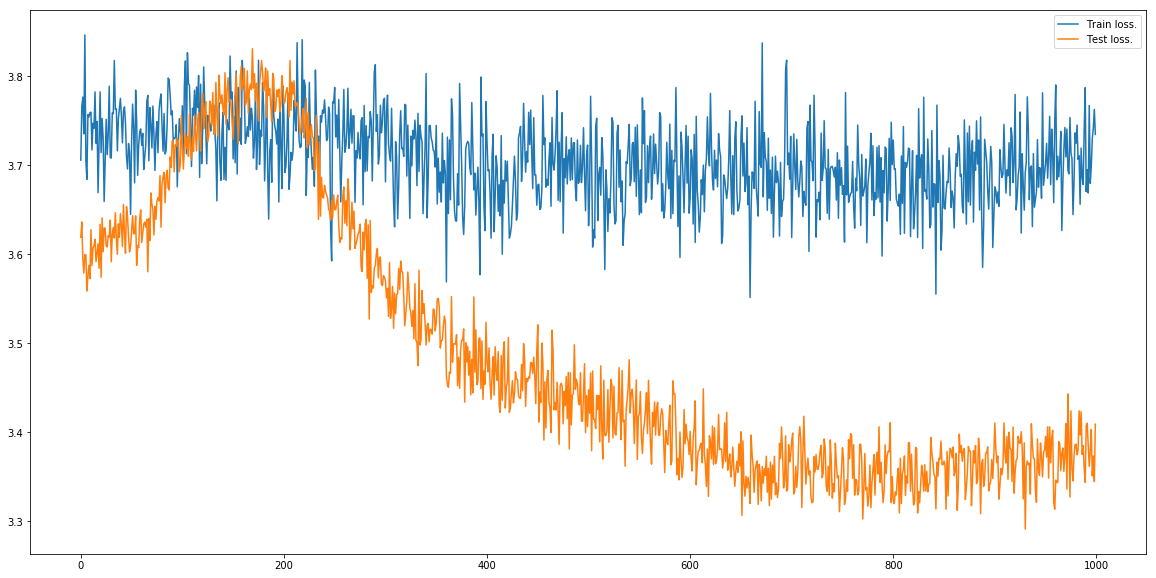

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(
    abstractable_semantics.logs_arr[:, 0],
    label="Train loss."
)
plt.plot(
    abstractable_semantics.logs_arr[:, 1],
    label="Test loss."
)
plt.legend()
plt.show()

In [27]:
abstract_list = abstractable_semantics.summarize(
    observed_arr,
    vectorizable_token,
    sentence_list,
    limit=5
)

In [28]:
for a in abstract_list[:5]:
    print(a)

 A dictionary is a linguistic work which primarily focuses on alphabetical listing of words and their definitions.

 As several titles illustrate, there was not a settled notion about its spelling nor its status as a noun.

 As a valued source of reliable information compiled by experts, printed versions found a prominent place in libraries, schools and other educational institutions.

 An encyclopedia is, theoretically, not written in order to convince, although one of its goals is indeed to convince its reader of its own veracity.

 Synonymous words and those related by the subject matter are to be found scattered around the dictionary, giving no obvious place for in-depth treatment.

